# Aquatic Algorithms Part 1: Streamflow analysis

Step 0: Choose your case study location

Step 1: Get the following data for your location:
- Daily streamflow
- Watershed geometry

Step 2: Make plots of the streamflow and geometry

Step 3: Get the minimum and maximum flow values from history

First, run the folling cell to install the packages that are used in this activity


In [27]:
# Install the packages we will use here
!pip install numpy matplotlib pandas geopandas pygeohydro pydaymet seaborn


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


***
## Step 0: Choose your case study location

Before getting started with the code, vist the [USGS National Water Dashboard](https://dashboard.waterdata.usgs.gov/app/nwd/en/?region=lower48&aoi=default) and find your case study, then select one streamflow gauge to use for this analysis and assign it to the variable (`station_id`) below.

After choosing a gauge location, find the coordinates for the spot.  These do not have to be perfect, just roughly in the area or upstream of the gauge.  Save these in the `coordinates` list below.

> **Note:** This code, and others used during the internship will make different results based on the unique gauge you choose... feel free to try different gauges by changing the `station_id` and re-running the code.
 

In [26]:
# Add your own gauge ID here (make sure it is a string):
station_id = '04234000'

# Set the [longitude, latitude] of the gauge location
coordinates = [-76.494856, 42.458977]

# Add the time-range of interest
dates = ("1900-01-01", "2022-12-31")

***
## Step 1: Get data

We can get streamflow from the USGS website directly, but this tends to be more difficult and requires manually manipulating the data before we can use it.  Fortunately, there is an open-source Python package called `pygeohydro` which makes it each retrieve streamflow data more easily.

You can visit the [documentation for the PyGeoHydro](https://hyriver.readthedocs.io/en/latest/readme/pygeohydro.html) if you want to read more above the technical details at any point.

Let's start by importing the `pygeohydro` library.  We will also want to import the `numpy`, `pandas`, and `matplotlib` libraries (we will do this in almost all notebooks):

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cm as cm
import numpy as np

import pygeohydro as gh
from pygeohydro import NWIS

import pydaymet as daymet

from AquaticAlgorithms.plotting.timeseries_plots import plot_streamflow_by_year


With the packages ready to go, we can start getting our data!

We will use the funciton `pygeohydro.NWIS().get_streamflow()`.   Notice how this is a funciton, inside of a function, inside of the `pygeohydro` package.

This function just needs the `station_id` and the `dates` that we want to get data for.  

It is going to `return` a `pandas.DataFrame` (which is like an Excel table) containing our data.  

Let's go!

In [16]:
# Request the flow data
flow = NWIS().get_streamflow(station_id, dates, mmd=True)

# Set the date as the 'index'
flow.index = pd.to_datetime(flow.index.date)

# Look at the first few values
flow.head()


,USGS-04234000
1925-02-15,4.336560
1925-02-16,2.930916
1925-02-17,2.938393
1925-02-18,2.100988
1925-02-19,1.996313


Great!  You should see a small table with dates on the left, numbers on the right, and the gauge station ID at the top!

We did not previously learn about `pandas.DataFrame` variables, so this is a good chance to get the basics. 

When using lists (`[1,2,3]`) we learned about *indexing* which is how we get the number in a specific position in the list.  Data Frames are like very fancy lists, which have *indices* that can be named in useful ways.  The first index is the Row, and the second index is the Column.  

In these activities, the Row will always have Date information, and we can get values for a specific date range.  This is very helpful. 

We can then get specific values using the date and column name by specifying the *location* using `dataframe_name.loc[]`, like this: 

`my_dataframe.loc['2000-01-01':'2005-01-01', 'USGS-04234000']`

Check to see the streamflow value on Christmas day, 2005:

In [37]:
# Get the flow value
christmas_flow = flow.loc['2005-12-25', f'USGS-{station_id}']

# Print the result
print(f'The flow on Christmas Day 2005 was {christmas_flow:.2f} cfs')

The flow on Christmas Day 2005 was 1.58 cfs


In [57]:
# Daymet data is only available 1980-2022
climate_data = daymet.get_bycoords(coordinates, ('1980-01-01', '2022-12-30'))

# Show the first couple values
climate_data.head()

,dayl (s),prcp (mm/day),srad (W/m2),swe (kg/m2),tmax (degrees C),tmin (degrees C),vp (Pa)
1980-01-01,32214.619141,0.00,204.839996,18.799999,1.81,-6.46,376.890015
1980-01-02,32260.240234,0.00,165.460007,18.430000,1.03,-5.13,417.220001
1980-01-03,32309.589844,0.37,109.169998,18.799999,-2.67,-6.47,376.450012
1980-01-04,32362.630859,0.00,221.940002,18.799999,-5.00,-13.98,207.449997
1980-01-05,32419.310547,0.00,249.229996,18.799999,-0.85,-12.32,237.490005


## Step 2: Visualize streamflow history

The best way to get familiar with a set of data is to look at a variety of different visualizations.  

Data scientists must be able to "tell a story" with the data they have or else people will not be paying attention.  

Let's make a few nice plots to show off the streamflow data that we collected. Here, we are going to use the `matplotlib` package to help make our plots. 

Be sure to read the comments (`#`) to try and understand what each part of the plotting code is doing.  By understanding how to change small parts of the plot you will later be able to make more unique visuals. 

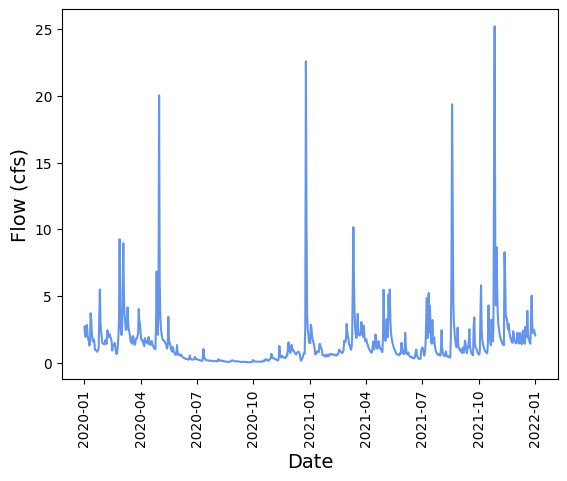

In [22]:
# Set a date range of interest
start_date = '2020-01-01'
end_date = '2022-01-01'

# Create the "figure" object
fig = plt.figure()

# Add a "subplot" axis (ax) to the figure; we will add the data onto the subplot
ax = fig.add_subplot()

# Pick just the data we want
x = flow.loc[start_date:end_date, :].index
y = flow.loc[start_date:end_date,:]

# Add a line plot to the figure
ax.plot(x, y, color = 'cornflowerblue', linewidth = 1.5, label = 'Flow')

# Modify labels 
ax.set_xlabel('Date', fontsize = 14)
ax.set_ylabel('Flow (cfs)', fontsize = 14)
plt.xticks(rotation=90)
plt.show()

## Step 3: Find times of interest

Think back to the purpose of your case study...  we want to find specific times of interest for this region.  Now we can use the stream data to find floods and very dry periods.  

Let's start by looking for the days with the highest flow, maybe there were floods that had an impact.


In [47]:
# Look at the days with the highest flow
flow.sort_values(by=f'USGS-{station_id}', ascending=False).head(5)

,USGS-04234000
1935-07-08,61.908127
1981-10-28,52.786398
1996-01-19,38.131818
2005-04-03,37.458903
1936-03-18,30.430686


Now you've got a few different dates to start looking more into.  Try Googling "flooding in {your location} on {one of the dates above}".   This is a good time to start taking notes!

## Step N: Export data

Now that we have all this data available, we want to save it so that we can use it again later. 

Luckily, the `pandas` library makes this very easy for us. 

We are going to save the data as a CSV which stands for "Comma Separated Values".  This is the same type of file that you use when you open something on Excel. 

We are going to put all the data inside a folder called 'Data'.  ***Start by making a new folder in the same location as this file, and name it Data.***

Once you have your Data folder ready, run the following. 

In [58]:
# Save the streamflow
flow.to_csv('./Data/streamflow.csv', sep=',')

# Save the climate data
climate_data.to_csv('./Data/climate_data.csv', sep=',')

Take a minute to go look inside the Data folder and make sure youre files are there...

Later we will see how to *load* this data from the files that we just saved. 

But this is the end of the work for now, nice job!

In [10]:
def plot_streamflow_by_year(df, log_scale=False, 
                            save_fig=False, save_name='streamflow_by_year.png'):
    
    # Create a new column for the year
    df['Year'] = df.index.year
    
    # Calculate the total streamflow for each year
    df['Total_Streamflow'] = df.groupby('Year')['streamflow'].transform('sum')

    # Sort the dataframe by the total streamflow for each year
    sorted_df = df.sort_values('Total_Streamflow', inplace=False)

    # Create a colormap to map each year to a color based on its total streamflow
    colormap = cm.get_cmap('viridis')
    colors = colormap(np.linspace(0, 1, sorted_df['Year'].nunique()))

    # Create a new figure
    fig, ax = plt.subplots()

    # Plot the streamflow for each year
    for i, year in enumerate(df['Year'].unique()):
        df_year = df[df['Year'] == year]
        ax.plot(df_year.index.dayofyear, df_year['streamflow'], 
                color=colors[i], label=year, alpha=0.3)

    # Set the y-axis to a log scale if specified
    if log_scale:
        ax.set_yscale('log')

    # Set the x-axis to show only the month
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    
    # Save the figure if specified
    if save_fig:
        plt.savefig(save_name)

    # Show the plot
    plt.show()
    return

In [11]:
def plot_streamflow_by_year(df, log_scale=False, 
                            save_fig=False, save_name='streamflow_by_year.png',
                            group_by='day', fill_range=False,
                            highlight_driest_year=False, highlight_wettest_year=False):

    # Create a new column for the year
    df = df.copy()
    df['Year'] = df.index.year

    # Group by the specified period
    if group_by == 'month':
        df_grouped = df.groupby([df.index.year.rename('Year'), df.index.month.rename('Month')])['streamflow'].sum()
        df_grouped.index.names = ['Year', 'Period']
    elif group_by == 'week':
        df_grouped = df.groupby([df.index.year.rename('Year'), df.index.weekofyear.rename('Week')])['streamflow'].sum()
        df_grouped.index.names = ['Year', 'Period']
    else:
        df_grouped = df.groupby([df.index.year.rename('Year'), df.index.dayofyear.rename('Day')])['streamflow'].mean()
        df_grouped.index.names = ['Year', 'Period']

    # Calculate the total streamflow for each year
    df_grouped = df_grouped.reset_index()
    df_grouped['Total_Streamflow'] = df_grouped.groupby('Year')['streamflow'].transform('sum')

    # Identify the driest and wettest years
    driest_year = df_grouped.groupby('Year')['Total_Streamflow'].sum().idxmin() if highlight_driest_year else None
    wettest_year = df_grouped.groupby('Year')['Total_Streamflow'].sum().idxmax() if highlight_wettest_year else None

    # Sort the dataframe by the total streamflow for each year
    sorted_df = df_grouped.sort_values('Total_Streamflow', inplace=False)

    # Create a colormap to map each year to a color based on its total streamflow
    colormap = cm.get_cmap('viridis')
    colors = colormap(np.linspace(0, 1, sorted_df['Year'].nunique()))

    # Create a new figure
    fig, ax = plt.subplots()

    # Plot the streamflow for each year
    for i, year in enumerate(sorted_df['Year'].unique()):
        df_year = sorted_df[sorted_df['Year'] == year]
        if fill_range:
            ax.fill_between(df_year['Period'], df_year['streamflow'].min(), df_year['streamflow'].max(), 
                            color=colors[i], alpha=0.3, label=year)
        else:
            ax.plot(df_year['Period'], df_year['streamflow'], color=colors[i], alpha=0.3, label=year)
        
        if year == driest_year:
            ax.plot(df_year['Period'], df_year['streamflow'], color='red', linewidth=2, label=f'{year} (Driest)')
        if year == wettest_year:
            ax.plot(df_year['Period'], df_year['streamflow'], color='blue', linewidth=2, label=f'{year} (Wettest)')

    # Set the y-axis to a log scale if specified
    if log_scale:
        ax.set_yscale('log')

    # Set the x-axis to show only the month
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    

    # Save the figure if specified
    if save_fig:
        plt.savefig(save_name)

    # Show the plot
    plt.show()
    return



C:\Users\tjame\AppData\Local\Temp\ipykernel_11140\3373443773.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('viridis')


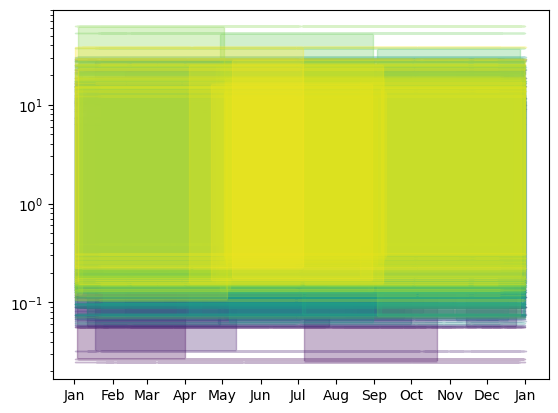

In [12]:

plot_streamflow_by_year(flow, log_scale=True,
                        group_by='day', fill_range=True)
